<img src="../images/blackfin_logo_black.png" style="float: left; margin: 20px; height: 55px">

# Project 2 - Ames Housing Data and Kaggle Challenge
# Notebook 2: Data Cleaning

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import nbimporter

from pandas.plotting import scatter_matrix
%matplotlib inline

In [2]:
# import datasets
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

In [3]:
# import functions
from notebook_01_EDA import rename_cols

In [4]:
# set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
# shape of datasets
print(train.shape)
print(test.shape)

(2051, 81)
(878, 80)


In [6]:
# apply imported function rename columns of both train and test datasets
train = rename_cols(train)
test = rename_cols(test)

# Clean Train Dataset

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [8]:
train.head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


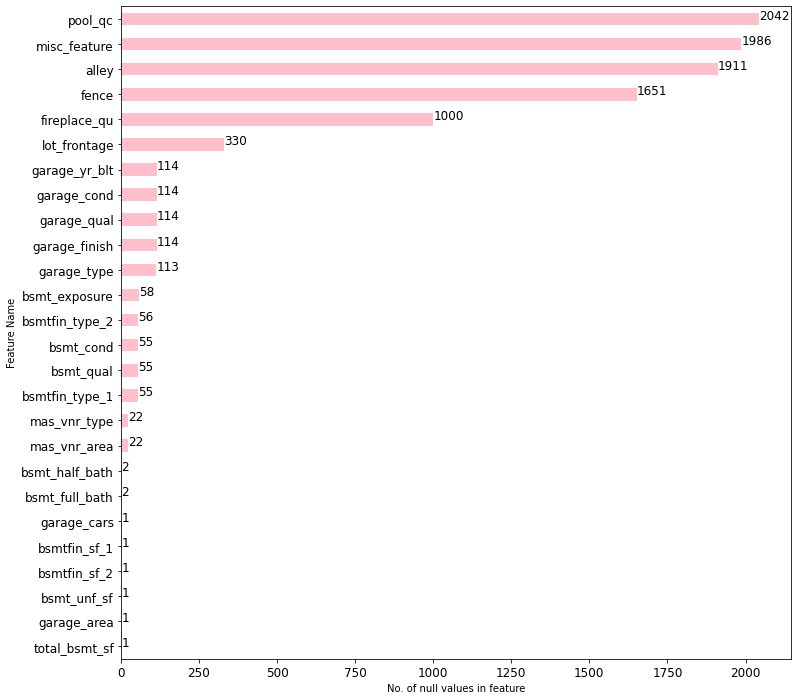

In [9]:
# plotting vairables with null values 

null = train.isnull().sum()[train.isnull().sum() > 0].sort_values()
null.plot(kind = 'barh', figsize = (12,12), color = 'pink', fontsize = 12);
plt.xlabel('No. of null values in feature')
plt.ylabel('Feature Name')

for y, x in enumerate(null):
    plt.annotate(x, xy = (x, y), size = 12)

## Investigating Missing values
### <center>Train Dataset</center>
|Index|Column Name|No. of Missing Values|Percentage of Missing Values (%)|Remarks|
|---|---|---|---|---|
|4|lot_frontage|330|16.09|Has no value|
|7|alley|1911|93.17|Null --> No alley access|
|26|mas_vnr_type|22|1.07|22 Missing values|
|27|mas_vnr_area|22|1.07|22 Missing values|
|31|bsmt_qual|55|2.68|Null --> No basement|
|32|bsmt_cond|55|2.68|Null --> No basement|
|33|bsmt_exposure|58|2.83|Null --> 55 units have no basements;<br> 3 units have missing value (id = 1797, 67, 2780)|
|34|bsmtfin_type_1|55|2.68|Null --> No basement|
|35|bsmtfin_sf_1|1|0.0488|No basement hence value should be 0 (id = 1342)|
|36|bsmtfin_type_2|56|2.73|Null --> 55 units have no basements;<br> 1 unit has missing value (id = 445)|
|37|bsmtfin_sf_2|1|0.0488|No basement hence value should be 0 (id = 1342)|
|38|bsmt_unf_sf|1|0.0488|No basement hence value should be 0 (id = 1342)|
|39|total_bsmt_sf|1|0.0488|No basement hence value should be 0 (id = 1342)|
|48|bsmt_full_bath|2|0.0975|No basement hence value should be 0 (id = 1498, 1342)|
|49|bsmt_half_bath|2|0.0975|No basement hence value should be 0 (id = 1498, 1342)|
|58|fireplace_qu|1000|48.76|Null --> No fireplace|
|59|garage_type|113|5.51|Null --> No garage|
|60|garage_yr_blt|114|5.56|Null --> 113 units have no garage;<br>1 unit has a missing value (id = 2237)|
|61|garage_finish|114|5.56|Null --> 113 units have no garage;<br>1 unit has a missing value (id = 2237)|
|62|garage_cars|1|0.0488|Missing value (id = 2237)|
|63|garage_area|1|0.0488|Missing value (id = 2237)|
|64|garage_qual|114|5.56|Null --> 113 units have no garage;<br>1 unit has a missing value (id = 2237)|
|65|garage_cond|114|5.56|Null --> 113 units have no garage;<br>1 unit has a missing value (id = 2237)|
|73|pool_qc|2042|99.56|Null --> No pool|
|74|fence|1651|80.50|Null --> No fence|
|75|misc_feature|1986|96.83|Null --> No misc feature|
<br>
### Next Steps
- Update null values to 0/'NA' according to the columns and IDs listed in the table above
    - For id = 1342, update following columns: ('bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath') to 0 and ('bsmt_qual', 'bsmt_cond', 'bsmtfin_type_1') to 'NA'
    - For id = 1498, update following columns: ('bsmt_full_bath', 'bsmt_half_bath') to 0
- Missing values in Features (numerical)
    - 16% of missing values in 'lot_frontage'
    - 1.07% of missing values in 'mas_vnr_area'
    - 0.0488% of missing values in 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'garage_cars', 'garage_area'
    - 0.0975% of missing values in 'bsmt_full_bath' and 'bsmt_half_bath'
    - 5.56% of missing values in 'garage_yr_blt'
    
- Replace Null values with NA in Categorical Features
    - (train.csv was imported with `na_filters = True`, which caused 'NA' strings to be replaced with null value)
    - Import train.csv again with `na_filters = False` to compare the number of true 'NA' values in order to avoid replacing missing values
        - 93.17% of missing values in 'alley'
        - 1.07% of missing values in 'mas_vnr_type'
        - 2.68% of missing values in 'bsmt_qual', 'bsmt_cond' and 'bsmtfin_type_1'
        - 2.83% of missing values in 'bsmt_exposure'
        - 2.73% of missing vallues in 'bsmtfin_type_2'
        - 48.76% of missing values in 'fireplace_qu'
        - 5.51% of missing values in 'garage_type'    
        - 5.56% of missing values in 'garage_finish', 'garage_qual' & 'garage_cond'
        - 99.56% of missing values in pool_qc
        - 80.5% of missing values in 'fence'
        - 96.83% of missing values in 'misc_feature'    
<br>

In [10]:
# update null values with 0 
train.loc[train['id'] == 1342, ['bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath']] = 0
train.loc[train['id'] == 1498, ['bsmt_full_bath', 'bsmt_half_bath']] = 0

train.loc[train['id'] == 1342, ['bsmt_qual', 'bsmt_cond', 'bsmtfin_type_1' ]] = 'NA'

In [11]:
train_raw = pd.read_csv('../datasets/train.csv', na_filter = False) # import data without filtering NA values to null values

In [12]:
rename_cols(train_raw).head() # rename dataset columns

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289,Gd,TA,CBlock,TA,TA,No,GLQ,533,Unf,0,192,725,GasA,Ex,Y,SBrkr,725,754,0,1479,0,0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976,RFn,2,475,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132,Gd,TA,PConc,Gd,TA,No,GLQ,637,Unf,0,276,913,GasA,Ex,Y,SBrkr,913,1209,0,2122,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997,RFn,2,559,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,Gd,CBlock,TA,TA,No,GLQ,731,Unf,0,326,1057,GasA,TA,Y,SBrkr,1057,0,0,1057,1,0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953,Unf,1,246,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,SBrkr,744,700,0,1444,0,0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0,TA,TA,PConc,Fa,Gd,No,Unf,0,Unf,0,676,676,GasA,TA,Y,SBrkr,831,614,0,1445,0,0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957,Unf,2,484,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500


In [13]:
cat_na_col = ['alley', 'mas_vnr_type', 'bsmt_qual', 'bsmt_cond', 'bsmtfin_type_1', 'bsmt_exposure', 'bsmtfin_type_2', 'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual', 'garage_cond', 'pool_qc', 'fence', 'misc_feature']

In [14]:
compare_trains = pd.DataFrame(columns = ['train_values', 'train_raw_values', 'T_F', 'train_dtype', 'train_raw_dtype'], index = cat_na_col)

In [15]:
# to compare missing and NA values in the train dataset
def column_cleaning():
    for n in cat_na_col:
        t = train[n].isnull().sum()
        train_type = train[n].unique()
        train_raw_type = train_raw[n].unique()
        t_r = train[train_raw[n] == 'NA']['id'].count()
        if t == t_r:
            compare_trains.loc[n] = [t, t_r, 'True', train_type, train_raw_type]
        else: 
            compare_trains.loc[n] = [t, t_r, 'False', train_type, train_raw_type]
column_cleaning()

/Users/CLARE/Applications/mambaforge/envs/dsi-sg/lib/python3.8/site-packages/pandas/core/internals/blocks.py:940: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)


In [16]:
compare_trains

,train_values,train_raw_values,T_F,train_dtype,train_raw_dtype
alley,1911,1911,True,"[nan, Pave, Grvl]","[NA, Pave, Grvl]"
mas_vnr_type,22,0,False,"[BrkFace, None, nan, Stone, BrkCmn]","[BrkFace, None, , Stone, BrkCmn]"
bsmt_qual,54,54,True,"[TA, Gd, Fa, nan, Ex, NA, Po]","[TA, Gd, Fa, NA, Ex, , Po]"
bsmt_cond,54,54,True,"[TA, Gd, nan, Fa, Po, Ex, NA]","[TA, Gd, NA, Fa, Po, Ex, ]"
bsmtfin_type_1,54,54,True,"[GLQ, Unf, ALQ, Rec, nan, BLQ, LwQ, NA]","[GLQ, Unf, ALQ, Rec, NA, BLQ, LwQ, ]"
bsmt_exposure,58,54,False,"[No, Gd, Av, nan, Mn]","[No, Gd, Av, NA, Mn, ]"
bsmtfin_type_2,56,54,False,"[Unf, Rec, nan, BLQ, GLQ, LwQ, ALQ]","[Unf, Rec, NA, BLQ, GLQ, LwQ, ALQ, ]"
fireplace_qu,1000,1000,True,"[nan, TA, Gd, Po, Ex, Fa]","[NA, TA, Gd, Po, Ex, Fa]"
garage_type,113,113,True,"[Attchd, Detchd, BuiltIn, Basment, nan, 2Types...","[Attchd, Detchd, BuiltIn, Basment, NA, 2Types,..."
garage_finish,114,113,False,"[RFn, Unf, Fin, nan]","[RFn, Unf, Fin, NA, ]"


From the table above, 
1. For all true rows above, update train columns with nan value to 'NA'
2. For (train_values > train_raw_values), sift out the mismatched value between train and train_raw data and update all other nan value to 'NA'<br>
    a. The odd nan values are missing values 
3. For mas_vnr_type, where train_values < train_raw_values, there are 22 missing values

In [17]:
# point 1
col_to_update_1 = ['alley', 'bsmt_qual', 'bsmt_cond', 'bsmtfin_type_1', 'fireplace_qu', 'garage_type', 'pool_qc', 'fence', 'misc_feature']

for c in col_to_update_1:
    train[c].fillna('NA', inplace = True)

In [18]:
# point 2
col_to_update_2 = ['garage_finish', 'garage_qual', 'garage_cond']
for c in col_to_update_2:
    train[c] = train[train['id'] != 2237][c].replace(np.nan, 'NA')

In [19]:
# point 2
train['bsmt_exposure'] = train[(train['id'] != 1797) & (train['id'] != 67) & (train['id'] != 2780)]['bsmt_exposure'].replace(np.nan, 'NA')
train['bsmtfin_type_2'] = train[train['id'] != 445]['bsmtfin_type_2'].replace(np.nan, 'NA')

In [20]:
column_cleaning()
compare_trains # check that data has been cleaned correctly

/Users/CLARE/Applications/mambaforge/envs/dsi-sg/lib/python3.8/site-packages/pandas/core/internals/blocks.py:940: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)


,train_values,train_raw_values,T_F,train_dtype,train_raw_dtype
alley,0,1911,False,"[NA, Pave, Grvl]","[NA, Pave, Grvl]"
mas_vnr_type,22,0,False,"[BrkFace, None, nan, Stone, BrkCmn]","[BrkFace, None, , Stone, BrkCmn]"
bsmt_qual,0,54,False,"[TA, Gd, Fa, NA, Ex, Po]","[TA, Gd, Fa, NA, Ex, , Po]"
bsmt_cond,0,54,False,"[TA, Gd, NA, Fa, Po, Ex]","[TA, Gd, NA, Fa, Po, Ex, ]"
bsmtfin_type_1,0,54,False,"[GLQ, Unf, ALQ, Rec, NA, BLQ, LwQ]","[GLQ, Unf, ALQ, Rec, NA, BLQ, LwQ, ]"
bsmt_exposure,3,54,False,"[No, Gd, Av, NA, Mn, nan]","[No, Gd, Av, NA, Mn, ]"
bsmtfin_type_2,1,54,False,"[Unf, Rec, NA, BLQ, GLQ, LwQ, ALQ, nan]","[Unf, Rec, NA, BLQ, GLQ, LwQ, ALQ, ]"
fireplace_qu,0,1000,False,"[NA, TA, Gd, Po, Ex, Fa]","[NA, TA, Gd, Po, Ex, Fa]"
garage_type,0,113,False,"[Attchd, Detchd, BuiltIn, Basment, NA, 2Types,...","[Attchd, Detchd, BuiltIn, Basment, NA, 2Types,..."
garage_finish,1,113,False,"[RFn, Unf, Fin, NA, nan]","[RFn, Unf, Fin, NA, ]"


In [21]:
# check for any houses with garage_yr_built earlier than year_built of house itself
train[train['garage_yr_blt'] < train['year_built']]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
72,2613,535403150,20,RL,79.0,8910,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1959,1959,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,Mn,ALQ,655.0,Unf,0.0,0.0,655.0,GasA,Ex,Y,SBrkr,1194,0,0,1194,0.0,1.0,1,0,3,1,TA,6,Typ,1,Fa,BuiltIn,1954.0,Fin,2.0,539.0,TA,TA,Y,0,0,192,0,0,0,NA,NA,NA,0,7,2006,WD,159500
77,1350,903235100,30,RM,60.0,6324,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Feedr,RRNn,1Fam,1Story,4,6,1927,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,520.0,520.0,GasA,Fa,N,SBrkr,520,0,0,520,0.0,0.0,1,0,1,1,Fa,4,Typ,0,NA,Detchd,1920.0,Unf,1.0,240.0,Fa,TA,Y,49,0,87,0,0,0,NA,NA,NA,0,5,2008,WD,68500
336,694,902103100,50,RM,68.0,4080,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,6,8,1935,1998,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0.0,Unf,0.0,901.0,901.0,GasA,Gd,Y,SBrkr,861,517,0,1378,0.0,0.0,1,0,3,1,Gd,6,Typ,0,NA,Detchd,1920.0,Unf,1.0,162.0,Fa,Fa,P,54,0,40,0,0,0,NA,NA,NA,0,6,2009,WD,128900
493,911,909250080,70,RL,43.0,5707,Pave,NA,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Feedr,Norm,1Fam,2Story,6,6,1935,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,583.0,583.0,GasA,Gd,Y,FuseF,647,595,0,1242,0.0,0.0,1,1,3,1,TA,6,Typ,1,Gd,Detchd,1926.0,Unf,1.0,180.0,Fa,TA,Y,329,96,0,0,0,0,NA,NA,NA,0,3,2009,WD,105000
533,904,909101100,50,RL,45.0,8212,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,5,6,1941,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,626.0,Unf,0.0,94.0,720.0,GasA,Ex,Y,SBrkr,854,444,0,1298,0.0,0.0,1,0,3,1,TA,6,Typ,2,Gd,Detchd,1940.0,Unf,1.0,256.0,TA,TA,Y,84,0,0,0,0,0,NA,NA,NA,0,9,2009,WD,122000
902,2110,906382060,20,RL,73.0,8760,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,36.0,Unf,0.0,1453.0,1489.0,GasA,Ex,Y,SBrkr,1500,0,0,1500,0.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2005.0,RFn,2.0,674.0,TA,TA,Y,144,38,0,0,0,0,NA,NA,NA,0,6,2007,WD,212999
1076,1352,903400180,50,RL,64.0,13053,Pave,Pave,Reg,Bnk,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,6,7,1923,2000,Gambrel,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,833.0,833.0,GasA,Gd,Y,SBrkr,1053,795,0,1848,0.0,0.0,1,1,4,1,Gd,8,Typ,1,Gd,Detchd,1922.0,Unf,2.0,370.0,TA,TA,N,0,0,0,0,220,0,NA,NA,NA,0,6,2008,WD,207000
1686,2627,535454060,90,RL,60.0,8544,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1950,1950,Gable,CompShg,Stucco,Stone,None,0.0,TA,TA,CBlock,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,Gd,N,FuseF,1040,0,0,1040,0.0,0.0,2,0,2,2,TA,6,Typ,0,NA,Detchd,1949.0,Unf,2.0,400.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,7,2006,WD,93500
1716,1528,909253190,30,RL,52.0,6292,Pave,NA,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,5,1930,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,TA,Mn,Rec,384.0,Unf,0.0,384.0,768.0,GasA,TA,N,SBrkr,790,0,0,790,0.0,0.0,1,0,2,1,TA,4,Typ,0,NA,Detchd,1925.0,Unf,1.0,160.0,Fa,TA,Y,0,141,0,0,0,0,NA,NA,NA,0,4,2008,WD,91000
1907,123

In [22]:
# replace 'garage_yr_blt' value with 'year_built' for houses whose garage year built was early than the year_built of house itself
train['garage_yr_blt'] = np.where((train['garage_yr_blt'] < train['year_built']), train['year_built'], train['garage_yr_blt'])

## Impute Null Values

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            2051 non-null   object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

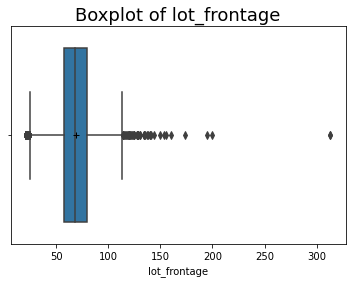

In [24]:
# determing what to do with lot_frontage null values 
plt.figure(figsize = (6,4))
sns.boxplot(data = train, x = train['lot_frontage'], showmeans = True, meanprops = {'marker': '+', 'markeredgecolor':'black'})
plt.title('Boxplot of lot_frontage', fontsize = 18);

In [25]:
lotfrontage_df = []
lotfrontage_df = train[train['lot_frontage'].notnull()]['lot_frontage']

In [26]:
lotfrontage_q1, lotfrontage_q3 = np.percentile(lotfrontage_df, [25,75])
print(lotfrontage_q1, lotfrontage_q3)

58.0 80.0


Outliers can be observed on both ends of the boxplot, but many more can be observed on the right hand side of the plot. Most of the distribution values are between Q1 and Q3, which are 58 and 80 respectively. We will impute the null values with the median instead of the mean to prevent any changes to mean after imputation.

In [27]:
train['lot_frontage'].fillna(train['lot_frontage'].median(), inplace = True)

In [28]:
train['lot_frontage'].isnull().sum() # check that all null values have been inputed

0

In [29]:
train[train['mas_vnr_type'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
22,2393,528142010,60,RL,103.0,12867,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,Unf,0.0,Unf,0.0,1209.0,1209.0,GasA,Ex,Y,SBrkr,1209,1044,0,2253,0.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2005.0,Fin,2.0,575.0,TA,TA,Y,243,142,0,0,0,0,NA,NA,NA,0,7,2006,New,344133
41,2383,528110050,20,RL,107.0,13891,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,Ex,Y,SBrkr,2076,0,0,2076,1.0,0.0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3.0,850.0,TA,TA,Y,216,229,0,0,0,0,NA,NA,NA,0,9,2006,New,465000
86,539,531371050,20,RL,67.0,10083,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NA,Attchd,2003.0,RFn,2.0,555.0,TA,TA,Y,0,41,0,0,0,0,NA,NA,NA,0,8,2009,WD,184900
212,518,528458020,20,FV,90.0,7993,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,NA,NA,NA,0,10,2009,New,225000
276,2824,908130020,20,RL,75.0,8050,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,TA,TA,PConc,Gd,TA,Av,GLQ,475.0,ALQ,297.0,142.0,914.0,GasA,Ex,Y,SBrkr,914,0,0,914,1.0,0.0,1,0,2,1,Gd,4,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,N,32,0,0,0,0,0,NA,NA,NA,0,4,2006,WD,117250
338,1800,528458150,60,FV,112.0,12217,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2007,2007,Hip,CompShg,WdShing,Wd Shng,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,GLQ,745.0,Unf,0.0,210.0,955.0,GasA,Ex,Y,SBrkr,955,925,0,1880,1.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2007.0,Fin,3.0,880.0,TA,TA,Y,168,127,0,0,0,0,NA,NA,NA,0,12,2007,New,310013
431,1455,907251090,60,RL,75.0,9473,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804.0,Unf,0.0,324.0,1128.0,GasA,Ex,Y,SBrkr,1128,903,0,2031,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2.0,577.0,TA,TA,Y,0,211,0,0,0,0,NA,NA,NA,0,3,2008,WD,237000
451,1120,528439010,20,RL,87.0,10037,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,666.0,Unf,0.0,794.0,1460.0,GasA,Ex,Y,SBrkr,1460,0,0,1460,0.0,0.0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,Fin,2.0,480.0,TA,TA,Y,0,20,0,0,0,0,NA,NA,NA,0,8,2008,WD,247000
591,1841,533208040,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106.0,Unf,0.0,135.0,1241.0,GasA,Ex,Y,SBrkr,1241,0,0,1241,1.0,0.0,1,1,1,1,Gd,4,Typ,0,NA,Attchd,2007.0,Fin,2.0,569.0,TA,TA,Y,0,116,0,0,0,0,NA,NA,NA,0,11,200

With respect to `mas_vnr_type` and `mas_vnr_area`, we assume that these values are missing because the houses do not have a masonry veneer. Hence, they will be inputed with 'NA' and 0 respectively. 

In [30]:
train['mas_vnr_type'].fillna('None', inplace = True)
train['mas_vnr_area'].fillna(0, inplace = True)

In [31]:
print(train['mas_vnr_type'].isnull().sum())
print(train['mas_vnr_area'].isnull().sum())

0
0


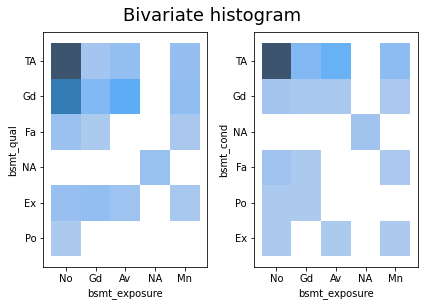

In [32]:

fig, ax = plt.subplots(1,2)
sns.histplot(data = train, x = 'bsmt_exposure', y = 'bsmt_qual', ax = ax[0])
sns.histplot(data = train, x = 'bsmt_exposure', y = 'bsmt_cond', ax = ax[1])
plt.tight_layout()
plt.suptitle('Bivariate histogram', size = 18, y = 1.05);

In [33]:
train[train['bsmt_exposure'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1456,1797,528458090,60,FV,81.0,10411,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725,863,0,1588,0.0,0.0,3,0,3,1,Gd,8,Typ,0,NA,Attchd,2007.0,Unf,2.0,561.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,7,2007,New,212109
1547,67,528445060,20,RL,73.0,8987,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,3.0,880.0,TA,TA,Y,144,0,0,0,0,0,NA,NA,NA,0,5,2010,WD,221500
1997,2780,907194130,60,RL,65.0,14006,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,840,0,1776,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,474.0,TA,TA,Y,144,96,0,0,0,0,NA,NA,NA,0,2,2006,WD,192500


All 3 houses above has a null value for `bsmt_exposure`, the `bsmt_qual` is good and `bsmt_cond` is typical. 
For houses with `bsmt_qual` == `Gd` and `bsmt_cond` == `TA`, their `bsmt_exposure` value is usually `No`.
Hence, these null values will be imputed with `No`

In [34]:
train['bsmt_exposure'].fillna('No', inplace = True)

In [35]:
train['bsmt_exposure'].isnull().sum()

0

In [36]:
train[train['bsmtfin_type_2'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1147,445,528142130,20,RL,85.0,10655,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,GasA,Ex,Y,SBrkr,1629,0,0,1629,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3.0,880.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,10,2009,WD,284000


Since `bsmtfin_type_1` is completed, and there's still unfinished basement area, `bsmtfin_type_2` for the house above will be imputed with `Unf`.

In [37]:
train['bsmtfin_type_2'].fillna('Unf', inplace = True)

In [38]:
train['bsmtfin_type_2'].isnull().sum()

0

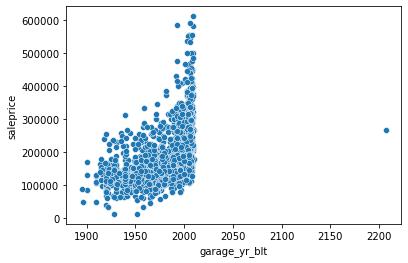

In [39]:
sns.scatterplot(data = train, x = 'garage_yr_blt', y = 'saleprice');

In [40]:
train[train['garage_yr_blt'].notnull()].sort_values('garage_yr_blt').tail(1)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1699,2261,916384070,20,RL,68.0,8298,Pave,NA,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,NA,NA,NA,0,9,2007,New,267300


An outlier can be observed from the scatterplot above. Since the `year_built` was 2006 and `year_remod_add` was 2007, we conclude that it was erroneously recorded and will be updated to 2007.  

In [41]:
train['garage_yr_blt'].replace({2207:2007}, inplace = True)

In [42]:
train[train['garage_area'] == 0]['garage_area'].count()

113

We have noted previously that there are 113 null values in `garage_yr_blt` and also 113 houses with 0 garage area. Hence these houses with null values do not have a garage and will be imputed with the value of `year_built`. 

In [43]:
train['garage_yr_blt'].fillna(train['year_built'], inplace = True)

In [44]:
train['garage_yr_blt'].isnull().sum()

0

In [45]:
train[train['id'] == 2237]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1712,2237,910201180,70,RM,50.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Detchd,1923.0,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NA,MnPrv,NA,0,3,2007,WD,150909


Since it is only one house with null values for `garage_finish`, `garage_cars`, `garage_area`, `garage_qual` and `garage_cond`, these null values will be imputed with 0 or NA depending on data type. 

In [46]:
garage_null = ['garage_finish', 'garage_cars', 'garage_area', 'garage_qual', 'garage_cond']

for g in garage_null:
    if train[g].dtypes == 'object':
        train[g].fillna('NA', inplace = True)
    else: 
        train[g].fillna(0, inplace = True)

In [47]:
train[train['id'] == 2237]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1712,2237,910201180,70,RM,50.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Detchd,1923.0,NA,0.0,0.0,NA,NA,Y,174,0,212,0,0,0,NA,MnPrv,NA,0,3,2007,WD,150909


In [48]:
train.isnull().sum().sum()

0

## Identify Outliers

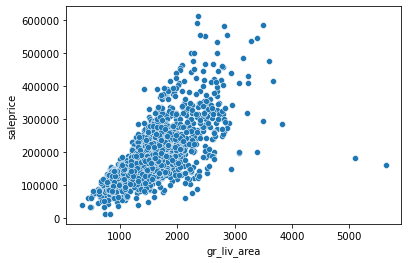

In [49]:
sns.scatterplot(data = train, x = 'gr_liv_area', y = 'saleprice');

From the scatterplot above, 2 outliers can be observed. These houses had low saleprice despite the high ground living area. Hence these 2 rows should be dropped, since they do not follow the pattern of high living areas, higher saleprices are. 

In [50]:
train['gr_liv_area'].sort_values(ascending = False).head(2)

960     5642
1885    5095
Name: gr_liv_area, dtype: int64

In [51]:
train.drop(train[train['gr_liv_area'] > 5000].index, inplace = True)

In [52]:
train.isnull().sum().sum() # verify that train dataset has been cleaned

0

## Drop Irrelevant Columns 

- Since `id` and `pid` are unique identifiers, they will not help with prediction of the dependent variable. Hence, these columns should be dropped. 


In [53]:
train.drop(columns = ['id', 'pid'], inplace = True)
train.shape

(2049, 79)

## Encode Ordinal Variables - Train Dataset

In [54]:
# Calling for variable created in notebook_01
%store -r cat_features 

In [55]:
cat_features

['ms_zoning',
 'street',
 'alley',
 'lot_shape',
 'land_contour',
 'utilities',
 'lot_config',
 'land_slope',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'exter_qual',
 'exter_cond',
 'foundation',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_type_2',
 'heating',
 'heating_qc',
 'central_air',
 'electrical',
 'kitchen_qual',
 'functional',
 'fireplace_qu',
 'garage_type',
 'garage_finish',
 'garage_qual',
 'garage_cond',
 'paved_drive',
 'pool_qc',
 'fence',
 'misc_feature',
 'sale_type']

In [56]:
ordinal_features = ['lot_shape', 'utilities', 'land_slope', 'exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heatingqc', 'electrical', 'kitchen_qual', 'functional', 'fireplace_qu', 'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc', 'fence' ]
nominal_features = ['ms_zoning', 'street', 'alley', 'land_contour', 'lot_config', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'foundation', 'heating', 'central_air', 'garage_type', 'misc_feature', 'sale_type']

In [57]:
len(cat_features) == len(ordinal_features) + len(nominal_features)

True

In [58]:
train['street'] = train['street'].map({'Pave': 1, 'Grvl': 0})

In [59]:
train = pd.get_dummies(data = train, columns = ['alley']).drop('alley_NA', axis = 1)

In [60]:
# lot_shape - seems like irregular lot shapes have a higer mean and median than regular lot shapes
train['lot_shape'] = train['lot_shape'].map({'Reg': 0, 'IR1': 1, 'IR2': 1, 'IR3': 1 })

In [61]:
train = pd.get_dummies(data = train, columns = ['ms_subclass']) # `ms_subclass` is treated as a categorical variable instead, as each subclass has a different definition

In [62]:
# Since most of the houses fall under all public utilities, it is unlikely to have any impact on the model
train.drop(columns = ['utilities'], inplace = True)

In [63]:
train['land_slope'] = train['land_slope'].map({'Gtl': 0, 'Mod': 1, 'Sev': 2})

In [64]:
train = pd.get_dummies(data = train, columns = ['mas_vnr_type']).drop('mas_vnr_type_None', axis = 1)

In [65]:
train['exter_qual'] = train['exter_qual'].map({'Ex': 3, 'Gd': 2, 'TA': 1, 'Fa': 0})

In [66]:
train['exter_cond'] = train['exter_cond'].map({'Ex': 3, 'Gd': 2, 'TA': 1, 'Fa': 0, 'Po': -1})

In [67]:
train['bsmt_qual'] = train['bsmt_qual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': -1, 'NA': 0})

In [68]:
train['bsmt_cond'] = train['bsmt_cond'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': -1, 'NA': 0})

In [69]:
train['bsmt_exposure'] = train['bsmt_exposure'].map({'Gd': 3, 'Av': 2, 'Mn': 1, 'No': -1, 'NA': 0})

In [70]:
train['bsmtfin_type_1'] = train['bsmtfin_type_1'].map({'GLQ':3 , 'ALQ':2 , 'BLQ': 1, 'Rec': 2, 'LwQ': -1, 'Unf': -0.5, 'NA': 0})

In [71]:
train['bsmtfin_type_2'] = train['bsmtfin_type_2'].map({'GLQ':3 , 'ALQ':2 , 'BLQ': 1, 'Rec': 2, 'LwQ': -1, 'Unf': -0.5, 'NA': 0})

In [72]:
train['heating_qc'] = train['heating_qc'].map({'Ex': 3, 'Gd': 2, 'TA': 1, 'Fa': 0, 'Po': -1})

In [73]:
train['central_air'] = train['central_air'].map({'Y': 1, 'N': 0})

In [74]:
train['electrical'] = train['electrical'].map({'SBrkr': 3, 'FuseA': 2, 'FuseF': 1, 'FuseP': -1,  'Mix': 0})

In [75]:
train['kitchen_qual'] = train['kitchen_qual'].map({'Ex': 3, 'Gd': 2, 'TA': 1, 'Fa': 0, 'Po': -1})

In [76]:
train['functional'] = train['functional'].map({'Typ': 3, 'Min1': 2.5, 'Min2': 2, 'Mod': 1, 'Maj1': 0, 'Maj2': -0.5, 'Sev': -1, 'Sal': -2})

In [77]:
train['fireplace_qu'] = train['fireplace_qu'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': -1, 'NA': 0})

In [78]:
train['garage_finish'] = train['garage_finish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0})

In [79]:
train['garage_qual'] = train['garage_qual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': -1, 'NA': 0})

In [80]:
train['garage_cond'] = train['garage_cond'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': -1, 'NA': 0})

In [81]:
train['paved_drive'] = train['paved_drive'].map({'Y': 1, 'P': 0.5, 'N': 0})

In [82]:
train['pool_qc'] = train['pool_qc'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NA': 0})

In [83]:
train['fence'] = train['fence'].map({'GdPrv': 4,'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0})

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 96 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ms_zoning             2049 non-null   object 
 1   lot_frontage          2049 non-null   float64
 2   lot_area              2049 non-null   int64  
 3   street                2049 non-null   int64  
 4   lot_shape             2049 non-null   int64  
 5   land_contour          2049 non-null   object 
 6   lot_config            2049 non-null   object 
 7   land_slope            2049 non-null   int64  
 8   neighborhood          2049 non-null   object 
 9   condition_1           2049 non-null   object 
 10  condition_2           2049 non-null   object 
 11  bldg_type             2049 non-null   object 
 12  house_style           2049 non-null   object 
 13  overall_qual          2049 non-null   int64  
 14  overall_cond          2049 non-null   int64  
 15  year_built           

In [85]:
get_dummies_var_train = [col for col in train.select_dtypes(include=['object']).columns] # identify categorical columns to dummify

In [86]:
train = pd.get_dummies(data = train, columns = get_dummies_var_train, drop_first = True)

In [87]:
train.shape # shape of train dataset after dummifying

(2049, 209)

# Clean Test Dataset

In [88]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               878 non-null    int64  
 1   pid              878 non-null    int64  
 2   ms_subclass      878 non-null    int64  
 3   ms_zoning        878 non-null    object 
 4   lot_frontage     718 non-null    float64
 5   lot_area         878 non-null    int64  
 6   street           878 non-null    object 
 7   alley            58 non-null     object 
 8   lot_shape        878 non-null    object 
 9   land_contour     878 non-null    object 
 10  utilities        878 non-null    object 
 11  lot_config       878 non-null    object 
 12  land_slope       878 non-null    object 
 13  neighborhood     878 non-null    object 
 14  condition_1      878 non-null    object 
 15  condition_2      878 non-null    object 
 16  bldg_type        878 non-null    object 
 17  house_style     

## Investigating Missing values
### <center>Null Values in Test Dataset</center>
|Index|Column Name|No. of Missing Values|Percentage of Missing Values (%)|Remarks|
|---|---|---|---|---|
|4|lot_frontage|160|18.22|Has no value|
|7|alley|820|93.39|Null --> No alley access|
|26|mas_vnr_type|1|0.1139|Only 1 missing value|
|27|mas_vnr_area|1|0.1139|Only 1 missing value|
|31|bsmt_qual|25|2.85|Null --> No basement|
|32|bsmt_cond|25|2.85|Null --> No basement|
|33|bsmt_exposure|25|2.85|Null --> No basement|
|34|bsmtfin_type_1|25|2.85|Null --> No basement|
|36|bsmtfin_type_2|25|2.85|Null --> No basement|
|43|electrical|1|0.1139|Only 1 missing value|
|58|fireplace_qu|422|48.06|Null --> No fireplace|
|59|garage_type|44|5.01|Null --> No garage|
|60|garage_yr_blt|45|5.125|Null --> 44 units have no garage;<br>1 unit has a missing value (id = 1357)|
|61|garage_finish|45|5.125|Null --> 44 units have no garage;<br>1 unit has a missing value (id = 1357)|
|64|garage_qual|45|5.125|Null --> 44 units have no garage;<br>1 unit has a missing value (id = 1357)|
|65|garage_cond|45|5.125|Null --> 44 units have no garage;<br>1 unit has a missing value (id = 1357)|
|73|pool_qc|874|99.54|Null --> No pool|
|74|fence|706|80.41|Null --> No fence|
|75|misc_feature|837|95.33|Null --> No misc feature|

### Next Steps
- Update null values to 0/'NA' according to the columns and IDs listed in the table above
- Missing values in Features (numerical)
    - 18.22% of missing values in 'lot_frontage'
    - 0.1139% of missing values in 'mas_vnr_area'
    - 5.125% of missing values in 'garage_yr_blt'
    
<br>    

- Replace Null values with NA in Categorical Features
    - (test.csv was imported with `na_filters = True`, which caused 'NA' strings to be replaced with null value)
    - Import test.csv again with `na_filters = False` to compare the number of true 'NA' values in order to avoid replacing missing values
        - 93.39% of missing values in 'alley'
        - 0.1139 of missing values in 'mas_vnr_type'
        - 2.85% of missing values in 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2'
        - 0.1139% of missing values in 'electrical'
        - 48.06% of missing values in 'fireplace_qu'
        - 5.01% of missing values in 'garage_type'    
        - 5.125% of missing values in 'garage_finish', 'garage_qual' & 'garage_cond'
        - 99.54% of missing values in pool_qc
        - 80.41% of missing values in 'fence'
        - 95.33% of missing values in 'misc_feature'    
<br>

In [89]:
test_raw = pd.read_csv('../datasets/test.csv', na_filter = False) # import data without filtering NA values to null values

In [90]:
test_raw.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NA,Detchd,1910,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NA,NA,NA,0,4,2006,WD
1,2718,905108090,90,RL,,9662,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NA,Attchd,1977,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NA,NA,NA,0,8,2006,WD


In [91]:
rename_cols(test_raw).head(2) # rename dataset columns

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NA,Detchd,1910,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NA,NA,NA,0,4,2006,WD
1,2718,905108090,90,RL,,9662,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NA,Attchd,1977,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NA,NA,NA,0,8,2006,WD


In [92]:
cat_na_col_test = ['alley', 'mas_vnr_type', 'bsmt_qual', 'bsmt_cond', 'bsmtfin_type_1', 'bsmt_exposure', 'bsmtfin_type_2', 'electrical', 'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual', 'garage_cond', 'pool_qc', 'fence', 'misc_feature']

compare_test = pd.DataFrame(columns = ['test_values', 'test_raw_values', 'T_F', 'test_dtype', 'test_raw_dtype'], index = cat_na_col_test)

In [93]:
# to compare missing and NA values in the train dataset
def column_cleaning_test():
    for n in cat_na_col_test:
        t = test[n].isnull().sum()
        test_type = test[n].unique()
        test_raw_type = test_raw[n].unique()
        t_r = test[test_raw[n] == 'NA']['id'].count()
        if t == t_r:
            compare_test.loc[n] = [t, t_r, 'True', test_type, test_raw_type]
        else: 
            compare_test.loc[n] = [t, t_r, 'False', test_type, test_raw_type]

In [94]:
column_cleaning_test()
compare_test

/Users/CLARE/Applications/mambaforge/envs/dsi-sg/lib/python3.8/site-packages/pandas/core/internals/blocks.py:940: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)


,test_values,test_raw_values,T_F,test_dtype,test_raw_dtype
alley,820,820,True,"[Grvl, nan, Pave]","[Grvl, NA, Pave]"
mas_vnr_type,1,0,False,"[None, BrkFace, Stone, BrkCmn, CBlock, nan]","[None, BrkFace, Stone, BrkCmn, CBlock, ]"
bsmt_qual,25,25,True,"[Fa, Gd, TA, Ex, nan, Po]","[Fa, Gd, TA, Ex, NA, Po]"
bsmt_cond,25,25,True,"[TA, Gd, nan, Fa]","[TA, Gd, NA, Fa]"
bsmtfin_type_1,25,25,True,"[Unf, GLQ, BLQ, Rec, ALQ, nan, LwQ]","[Unf, GLQ, BLQ, Rec, ALQ, NA, LwQ]"
bsmt_exposure,25,25,True,"[No, Av, nan, Mn, Gd]","[No, Av, NA, Mn, Gd]"
bsmtfin_type_2,25,25,True,"[Unf, LwQ, nan, ALQ, GLQ, Rec, BLQ]","[Unf, LwQ, NA, ALQ, GLQ, Rec, BLQ]"
electrical,1,0,False,"[FuseP, SBrkr, FuseA, FuseF, nan]","[FuseP, SBrkr, FuseA, FuseF, ]"
fireplace_qu,422,422,True,"[nan, Gd, Fa, TA, Po, Ex]","[NA, Gd, Fa, TA, Po, Ex]"
garage_type,44,44,True,"[Detchd, Attchd, BuiltIn, nan, 2Types, CarPort...","[Detchd, Attchd, BuiltIn, NA, 2Types, CarPort,..."


From the table above, 
1. For all true rows above, update test columns with nan value to 'NA'
2. For (test_values > test_raw_values), sift out the mismatched value between test and test_raw data and update all other nan value to 'NA'
    a. The odd nan values are missing values
3. For remaining false rows above, decide what to do with missing values in subsequent section

In [95]:
# Point 1
col_update_test_1 = ['alley', 'bsmt_qual', 'bsmt_cond', 'bsmtfin_type_1', 'bsmt_exposure', 'bsmtfin_type_2', 'fireplace_qu', 'garage_type', 'garage_qual', 'garage_cond', 'pool_qc', 'fence', 'misc_feature']

for c in col_update_test_1:
    test[c].fillna('NA', inplace = True)

In [96]:
# Point 2
test['garage_finish'].compare(test_raw['garage_finish'])

,self,other
29,NaN,NA
45,NaN,NA
66,NaN,NA
68,NaN,NA
105,NaN,NA
109,NaN,NA
113,NaN,NA
144,NaN,NA
152,NaN,NA
156,NaN,NA


In [97]:
test['id'].loc[764] # identify 'id' of row with missing value

1357

In [98]:
test['garage_finish'] = test[test['id'] != 1357]['garage_finish'].replace(np.nan, 'NA') # replace all null values with 'NA' except for id: 1357

In [99]:
column_cleaning_test()
compare_test # check that data has been cleaned correctly

/Users/CLARE/Applications/mambaforge/envs/dsi-sg/lib/python3.8/site-packages/pandas/core/internals/blocks.py:940: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)


,test_values,test_raw_values,T_F,test_dtype,test_raw_dtype
alley,0,820,False,"[Grvl, NA, Pave]","[Grvl, NA, Pave]"
mas_vnr_type,1,0,False,"[None, BrkFace, Stone, BrkCmn, CBlock, nan]","[None, BrkFace, Stone, BrkCmn, CBlock, ]"
bsmt_qual,0,25,False,"[Fa, Gd, TA, Ex, NA, Po]","[Fa, Gd, TA, Ex, NA, Po]"
bsmt_cond,0,25,False,"[TA, Gd, NA, Fa]","[TA, Gd, NA, Fa]"
bsmtfin_type_1,0,25,False,"[Unf, GLQ, BLQ, Rec, ALQ, NA, LwQ]","[Unf, GLQ, BLQ, Rec, ALQ, NA, LwQ]"
bsmt_exposure,0,25,False,"[No, Av, NA, Mn, Gd]","[No, Av, NA, Mn, Gd]"
bsmtfin_type_2,0,25,False,"[Unf, LwQ, NA, ALQ, GLQ, Rec, BLQ]","[Unf, LwQ, NA, ALQ, GLQ, Rec, BLQ]"
electrical,1,0,False,"[FuseP, SBrkr, FuseA, FuseF, nan]","[FuseP, SBrkr, FuseA, FuseF, ]"
fireplace_qu,0,422,False,"[NA, Gd, Fa, TA, Po, Ex]","[NA, Gd, Fa, TA, Po, Ex]"
garage_type,0,44,False,"[Detchd, Attchd, BuiltIn, NA, 2Types, CarPort,...","[Detchd, Attchd, BuiltIn, NA, 2Types, CarPort,..."


## Imputate Null Values

In [100]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               878 non-null    int64  
 1   pid              878 non-null    int64  
 2   ms_subclass      878 non-null    int64  
 3   ms_zoning        878 non-null    object 
 4   lot_frontage     718 non-null    float64
 5   lot_area         878 non-null    int64  
 6   street           878 non-null    object 
 7   alley            878 non-null    object 
 8   lot_shape        878 non-null    object 
 9   land_contour     878 non-null    object 
 10  utilities        878 non-null    object 
 11  lot_config       878 non-null    object 
 12  land_slope       878 non-null    object 
 13  neighborhood     878 non-null    object 
 14  condition_1      878 non-null    object 
 15  condition_2      878 non-null    object 
 16  bldg_type        878 non-null    object 
 17  house_style     

In [101]:
test['lot_frontage'].median()

68.0

In [102]:
# lot_frontage - impute null values with median 
test['lot_frontage'].fillna(69.0, inplace = True)

In [103]:
test.head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NA,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NA,NA,NA,0,4,2006,WD
1,2718,905108090,90,RL,69.0,9662,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NA,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NA,NA,NA,0,8,2006,WD


In [104]:
test['lot_frontage'].isnull().sum() # check that all null values have been imputed

0

In [105]:
# mas_vnr_type and mas_vnr_area - assume no masonry veneer. Impute with None and 0 respectively   
test['mas_vnr_type'].fillna('None', inplace = True)
test['mas_vnr_area'].fillna(0, inplace = True)

In [106]:
print(test['mas_vnr_type'].isnull().sum())
print(test['mas_vnr_area'].isnull().sum())

0
0


In [107]:
# electrical - since only one house has a null value, it will be imputed with the mode value
test[test['electrical'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
634,1578,916386080,80,RL,73.0,9735,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NA,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,5,2008,WD


In [108]:
test['electrical'].mode()

0    SBrkr
Name: electrical, dtype: object

In [109]:
test['electrical'].fillna(value = 'SBrkr', inplace = True) 

In [110]:
test['electrical'].isnull().sum()

0

In [111]:
# checking if number of houses with garage corresponds with number of null values in 'garage_yr_blt'
test[test['garage_area'] == 0]['garage_area'].count()

44

In [112]:
# replace garage_yr_blt with year_blt for houses with 'garage_area' is 0
test['garage_yr_blt'] = np.where((test['garage_area'] == 0), test['year_built'], test['garage_yr_blt'])

In [113]:
test[test['garage_yr_blt'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
764,1357,903426160,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,Mn,Rec,196,Unf,0,1046,1242,GasA,Gd,Y,SBrkr,1242,742,0,1984,0,0,2,0,5,1,TA,8,Typ,0,NA,Detchd,NaN,NaN,1,360,NA,NA,Y,64,0,180,0,0,0,NA,MnPrv,Shed,1000,9,2008,WD


Since it's only one house that has null values for `garage_yr_blt` and `garage_finish`, they will be imputed with the `year_built` and 'NA' respectively

In [114]:
test['garage_yr_blt'].fillna(test['year_built'], inplace = True)
test['garage_finish'].fillna('NA', inplace = True)

In [115]:
test.isnull().sum().sum() # verify that train dataset has been cleaned

0

## Drop Irrelevant Columns 

In [116]:
test.drop(columns = ['id', 'pid'], inplace = True)
test.shape

(878, 78)

## Encode Ordinal Variables - Test Dataset

In [117]:
test['street'] = test['street'].map({'Pave': 1, 'Grvl': 0})
test = pd.get_dummies(data = test, columns = ['alley']).drop('alley_NA', axis = 1)
test['lot_shape'] = test['lot_shape'].map({'Reg': 0, 'IR1': 1, 'IR2': 1, 'IR3': 1 })
test = pd.get_dummies(data = test, columns = ['ms_subclass']) # `ms_subclass` is treated as a categorical variable instead, as each subclass has a different definition
test.drop(columns = ['utilities'], inplace = True)
test['land_slope'] = test['land_slope'].map({'Gtl': 0, 'Mod': 1, 'Sev': 2})
test = pd.get_dummies(data = test, columns = ['mas_vnr_type']).drop('mas_vnr_type_None', axis = 1)
test['exter_qual'] = test['exter_qual'].map({'Ex': 3, 'Gd': 2, 'TA': 1, 'Fa': 0})
test['exter_cond'] = test['exter_cond'].map({'Ex': 3, 'Gd': 2, 'TA': 1, 'Fa': 0, 'Po': -1})
test['bsmt_qual'] = test['bsmt_qual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': -1, 'NA': 0})
test['bsmt_cond'] = test['bsmt_cond'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': -1, 'NA': 0})
test['bsmt_exposure'] = test['bsmt_exposure'].map({'Gd': 3, 'Av': 2, 'Mn': 1, 'No': -1, 'NA': 0})
test['bsmtfin_type_1'] = test['bsmtfin_type_1'].map({'GLQ':3 , 'ALQ':2 , 'BLQ': 1, 'Rec': 2, 'LwQ': -1, 'Unf': -0.5, 'NA': 0})
test['bsmtfin_type_2'] = test['bsmtfin_type_2'].map({'GLQ':3 , 'ALQ':2 , 'BLQ': 1, 'Rec': 2, 'LwQ': -1, 'Unf': -0.5, 'NA': 0})
test['heating_qc'] = test['heating_qc'].map({'Ex': 3, 'Gd': 2, 'TA': 1, 'Fa': 0, 'Po': -1})
test['central_air'] = test['central_air'].map({'Y': 1, 'N': 0})
test['electrical'] = test['electrical'].map({'SBrkr': 3, 'FuseA': 2, 'FuseF': 1, 'FuseP': -1,  'Mix': 0})
test['kitchen_qual'] = test['kitchen_qual'].map({'Ex': 3, 'Gd': 2, 'TA': 1, 'Fa': 0, 'Po': -1})
test['functional'] = test['functional'].map({'Typ': 2, 'Min1': 1.5, 'Min2': 1, 'Mod': 0.5, 'Maj1': 0, 'Maj2': -0.5, 'Sev': -1, 'Sal': -2})
test['fireplace_qu'] = test['fireplace_qu'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': -1, 'NA': 0})
test['garage_finish'] = test['garage_finish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0})
test['garage_qual'] = test['garage_qual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': -1, 'NA': 0})
test['garage_cond'] = test['garage_cond'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': -1, 'NA': 0})
test['paved_drive'] = test['paved_drive'].map({'Y': 1, 'P': 0.5, 'N': 0})
test['pool_qc'] = test['pool_qc'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NA': 0})
test['fence'] = test['fence'].map({'GdPrv': 4,'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0})

In [118]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 95 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ms_zoning             878 non-null    object 
 1   lot_frontage          878 non-null    float64
 2   lot_area              878 non-null    int64  
 3   street                878 non-null    int64  
 4   lot_shape             878 non-null    int64  
 5   land_contour          878 non-null    object 
 6   lot_config            878 non-null    object 
 7   land_slope            878 non-null    int64  
 8   neighborhood          878 non-null    object 
 9   condition_1           878 non-null    object 
 10  condition_2           878 non-null    object 
 11  bldg_type             878 non-null    object 
 12  house_style           878 non-null    object 
 13  overall_qual          878 non-null    int64  
 14  overall_cond          878 non-null    int64  
 15  year_built            8

In [119]:
get_dummies_var_test = [col for col in test.select_dtypes(include=['object']).columns] # identify categorical columns to dummify

In [120]:
test = pd.get_dummies(data = test, columns = get_dummies_var_test)

In [121]:
# shape of datasets after dummifying
print(train.shape)
print(test.shape)

(2049, 209)
(878, 216)


In [122]:
diff_features_train = train.columns.difference(test.columns).drop('saleprice')
diff_features_test = test.columns.difference(train.columns)

In [123]:
train.drop(diff_features_train, axis=1, inplace=True)
test.drop(diff_features_test, axis=1, inplace=True)

In [124]:
print(train.shape)
print(test.shape)

(2049, 194)
(878, 193)


In [125]:
# saving cleaned data
train.to_csv('../datasets/train_cleaned.csv', index = False)
test.to_csv('../datasets/test_cleaned.csv', index= False)